In [36]:
import torch
from torchvision import datasets, models, transforms
from PIL import Image
from matplotlib.pyplot import imshow
import sys
sys.path.insert(0, '../')
from model import InceptionV3FER

In [68]:
ckpt_path = '../checkpoints/epoch=013-val_loss=0.385.ckpt'

In [69]:
class FER:
    def __init__(self, ckpt_path):
        self.model = InceptionV3FER.load_from_checkpoint(ckpt_path)
        self.test_transform = transforms.Compose([  transforms.Resize((326, 326)) ])

        self.data_transform = transforms.Compose([  transforms.Resize((326, 326)),
                                                    transforms.ToTensor() ])
        self.class_mapping = ['Afraid', 'Angry', 'Disgusted', 'Happy', 'Neutral', 'Sad', 'Surprised']
    
    def predict(self, img_path):
        img = Image.open(img_path)
        test = self.test_transform(img)

        imshow(test)

        img_t = self.data_transform(img)
        img_t = torch.unsqueeze(img_t, 0)

        self.model.eval()
        output = self.model(img_t)

        _, pred = torch.max(output, 1)

        return self.class_mapping[pred]

In [70]:
fer = FER(ckpt_path)

In [78]:
img_path = '../images/test.jpeg'

'Angry'

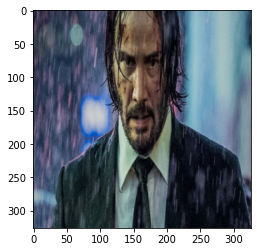

In [80]:
fer.predict(img_path)